In this notebook we will explore AutoVIML in order to reduce the time and effort we put to create machine learning model for this NLP task. The dataset here contains of a tweet, keyword from that tweet and location from where it was sent. The traget variable here predicts whether it is about a real disaster or not.

Dataset: https://www.kaggle.com/c/nlp-getting-started/data

Reference: https://github.com/AutoViML/deep_autoviml

In [ ]:
! pip install deep_autoviml

     |████████████████████████████████| 269 kB 4.7 MB/s 
     |████████████████████████████████| 308 kB 41.9 MB/s 
     |████████████████████████████████| 4.4 MB 48.8 MB/s 
     |████████████████████████████████| 14.5 MB 67 kB/s 
     |████████████████████████████████| 170 kB 69.6 MB/s 
     |████████████████████████████████| 23.2 MB 69.1 MB/s 
     |████████████████████████████████| 80 kB 7.8 MB/s 
     |████████████████████████████████| 209 kB 50.7 MB/s 
     |████████████████████████████████| 75 kB 4.7 MB/s 
     |████████████████████████████████| 144 kB 58.0 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 111 kB 56.4 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=9e93faae12c1458300c146866deed65585dec8bb1689bb3aff2f646305471cdf
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
  Created wheel for pyperclip: filename=pyperclip-1.8.2

In [ ]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Imported deep_auto_viml. version=0.0.67
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [ ]:
BATCHSIZE = 256
CLASSES = 10
EPOCHS = 25
NUM_TRIALS = 5

In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
target = 'target'
df[target].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
test_df = pd.read_csv('test.csv')
test_df

In [ ]:
keras_model_type =  "USE" ## always try "auto" first, then "basic", "deep", "BERT", "USE", cnn1", "LSTM" etc.
keras_options = {"early_stopping": True, 'epochs': 350, 'steps_per_epoch': 15, 'class_weight': True}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"storm", "max_trials":10, }

## always set the tuner to "storm" first and then "optuna"
#### You always need 15 max_trials to get something decent #####
trainfile = '/content/train.csv'

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    epochs : 350
    steps_per_epoch : 15
    class_weight : True
    early_stopping : True
Using following model_options given as input:
    max_trials : 10
    tuner : storm
Max Trials : 10. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
CSV file being loaded into tf.data.Dataset
    Since number of rows in file <= 10000 maxrows, loading entire file into pandas for EDA
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Classification and Single_Label problem
Loaded a small data sample of size = (7613, 5) into pandas dataframe to analyze...
    Classifying var

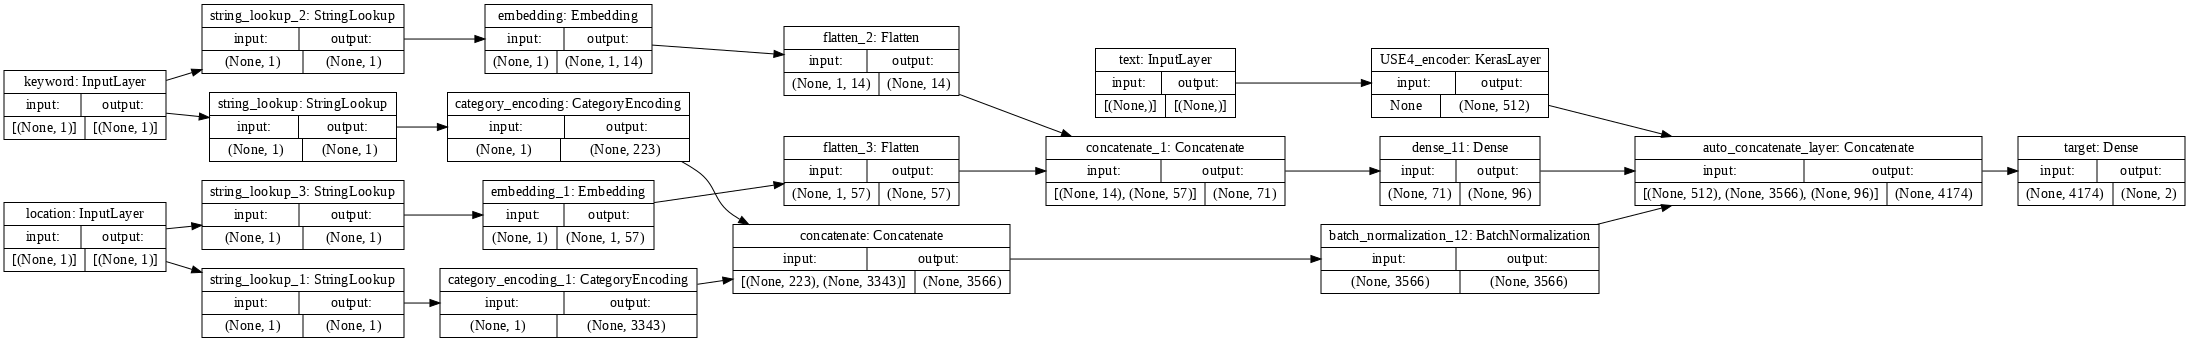

Model plot saved in file: deep_autoviml_churn_1_USE_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Training a USE model option...
    class_weights: {0: 1.0, 1: 1.1637114032405993}
    original datasize = 8562, initial batchsize = 96
    recommended steps per epoch = 44
    recommended OneCycle steps = 31500
    default initializer = lecun_normal, default activation = selu
    Recommended: Increase patience for "onecycle" scheduler
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10.0
    number of epochs = 350, steps per epoch = 15

Splitting train into 80+20 percent: train and validation data
    Splitting validation 20 into 1

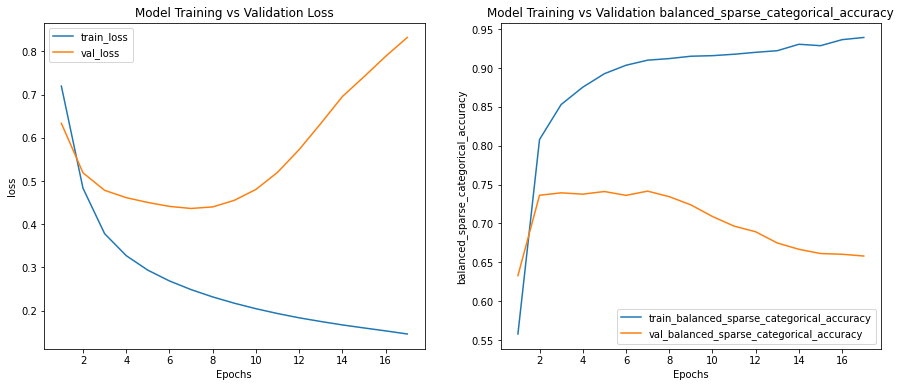


###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: target
#################################################################


    Accuracy          = 81.0%
    Balanced Accuracy = 79.6%
    Precision         = 78.0%
    Average Precision = 80.4%
    Recall            = 73.0%
    F1 Score          = 75.4%
    ROC AUC           = 87.0%
#####################################################

Training on full train dataset for 7 epochs. This will take time...
    completed. Time taken (in mins) = 0


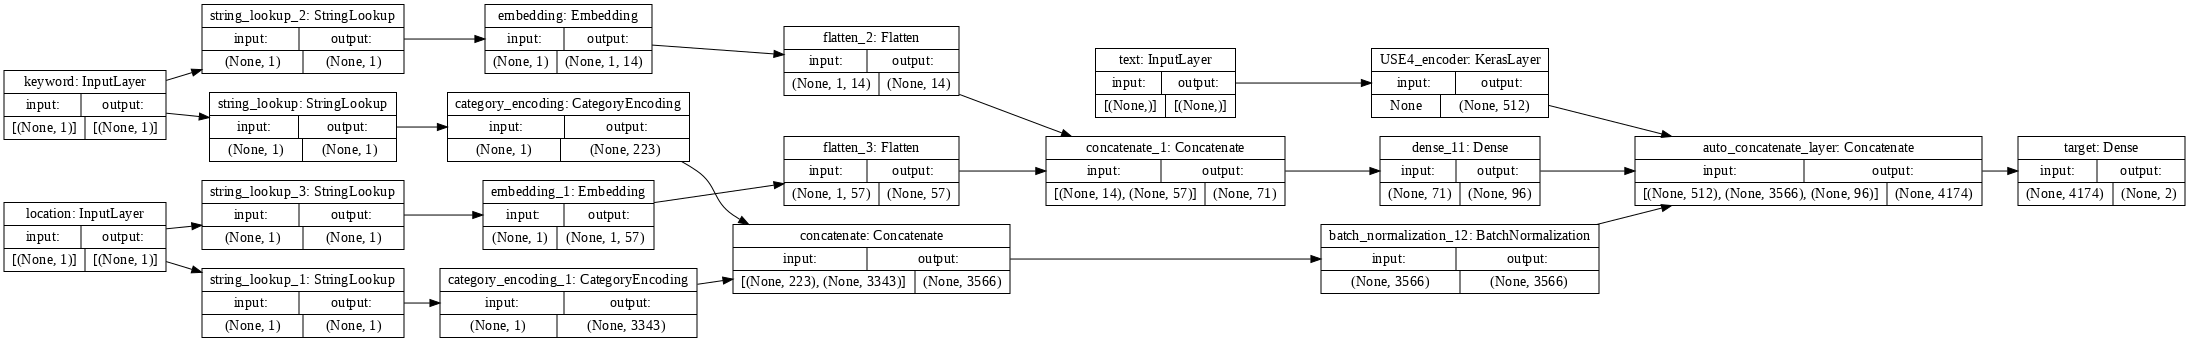

Model plot saved in file: deep_autoviml_churn_1_USE_model_after.png


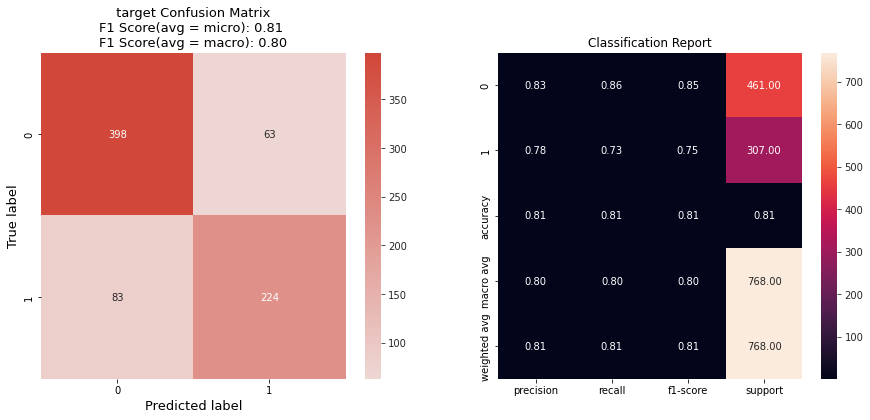

In [ ]:
model, dicti = deepauto.fit(trainfile, target, keras_model_type=keras_model_type, 
                            project_name='churn_1',
                 save_model_flag=False, model_options=model_options,
                            keras_options=keras_options, use_my_model='', verbose=2)

In [ ]:
testfile = '/content/test.csv'

In [ ]:
predictions = deepauto.predict(model, project_name='churn_1', test_dataset=testfile,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=dicti)


Loading deep_autoviml model from <keras.engine.functional.Functional object at 0x7f1fca0ed7d0> folder. This will take time...

Using <keras.engine.functional.Functional object at 0x7f1fca0ed7d0> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 3263
Alert! Modified column names to satisfy rules for column names in Tensorflow...
Alert! keyword has 2 mixed data types: Index([<class 'str'>, <class 'float'>], dtype='object') 
Alert! location has 2 mixed data types: Index([<class 'str'>, <class 'float'>], dtype='object') 
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    4 Predictors classified...
    possible latitude columns in dataset: []
        after further analysis, no latitude columns found
    possible longitude columns in dataset: []
        after further analysis, no longitude columns found
        1 variable(s) to be removed since they were ID or low-information varia

In [ ]:
test = pd.read_csv('/content/train.csv')
predictions[0][:5]

array([[0.376, 0.565],
       [0.17 , 0.784],
       [0.205, 0.742],
       [0.209, 0.737],
       [0.12 , 0.852]], dtype=float32)

In [ ]:
predictions[1][:5]

array([1, 1, 1, 1, 1])

In [ ]:
test[target].values[:5]

array([1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
#print(classification_report(test[target].values,predictions[1]))
print(np.sqrt(mean_squared_error(test[target].values,predictions[0])))

ValueError: ignored